# 1. Power Plants Inventory Data Analysis

Imports

In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# Print all columns of a datafame
pd.set_option('display.max_columns', None)

# Table of Content

* [Introduction](#introduction)
* [US Power Plants Inventory Data](#power-plants-data)
    * [Data Dictionary](#data-dictionary)
* [Data Loading](#data-loading)
* [Data Cleaning](#data-cleaning)
* [EDA](#eda)
    * [Categorical Columns](#categorical-columns)
    * [Numerical Columns](#numerical-columns)

---

## Introduction <a id="introduction"></a>

**Streamlining Renewable Energy Site Selection with ML:
Predict the Suitability of Solar Energy Resources**

The goal of this project is to apply machine learning techniques to classify whether solar is suitable as the primary energy source for a location.

This can help energy decision makers and energy companies to simplify the complex site selection process, thereby accelerating the transition to clean and sustainable energy sources, ultimately contributing to the fight against climate change and energy crisis. 

To begin this project, we will need to investigate the US power plants inventory data set that is the core of our model. This notebook will do some basic cleaning and EDA of the data set as well as understand the way in which the data is structured.

---

## US Power Plants Inventory Data <a id="power-plants-data"></a>

The dataset is a csv file downloaded from [U.S. Energy Atlas](https://atlas.eia.gov/datasets/eia::power-plants/about) website. The dataset provides information on 11,569 operable electric generating plants in the United States by energy source, as of September 2022. All the power plants included in the dataset have a combined nameplate capacity of 1 megawatt or more that are operating, are on standby, or out of service for short- or long-term.

The data was first published on July 10, 2020. The dataset was last updated on March 21, 2023 when I downloaded the dataset. According to the information on the website, the dataset seems to be updated quaterly.

There are 12 renewable/non-renewable energy source classes in the data: solar, natural gas, hydroelectric, wind, petroleum, biomass, coal, batteries, geothermal, nuclear, pumped storage, and other. 

This project will focus on the renewable energy sources: olar, wind, geothermal, hydroelectric, and biomass. Batteries, pumped storage, and nuclear can also be consider as renewable energy sources. We are excluding [battery storage power station](https://en.wikipedia.org/wiki/Battery_storage_power_station) and [pumped storage power plants](https://en.wikipedia.org/wiki/Pumped-storage_hydroelectricity) because they are designed to store electricity and act as dispatchable source of power on electric grids. Even though nuclear energy is considered a clean source of energy as it does not product greenhouse gas emissions, it relies on a finite resource, uranium. Fortunately, these power plants are the minorities, so we won't be losing significant information as we exclude them.

<strong>Renewable Energy Sources</strong>
1. Solar:
    - Uses Photovoltaic (PV) technology to convert solar radiation directly into electricity
2. Wind:
    - Uses wind turbines to convert the kinetic energy of the wind directly into electricity
3. Hydroelectric:
    - Uses turbines to convert the kinetic energy of water flow directly into electricity
4. Geothermal:
    - Uses the heat that is continuously produced inside the Earth to generate electricity
5. Biomass:
    - Burn living organisms to create heat and convert it into electricity

Let's take a look at the data dictionary for the US power plants inventory data set:

### Data Dictionary <a id="data-dictionary"></a>

| Attribute      | Description                                                                                                                                                                                                                                                                                                                                                                          | dType |
|----------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------|
| OBJECTID       | Internal feature number. Sequential unique whole numbers that are automatically generated                                                                                                                                                                                                                                                                                            | INT   |
| Plant_Code     | Unique ID of the Power Plant                                                                                                                                                                                                                                                                                                                                                         | INT   |
| Plant_Name     | Name of the Power Plant                                                                                                                                                                                                                                                                                                                                                              | STR   |
| Utility_ID     | ID for the company that is responsible for the day-to-day operations of the generator                                                                                                                                                                                                                                                                                                | INT   |
| Utility_Name   | Legal name of the company that is responsible for the day-to-day operations of the generator                                                                                                                                                                                                                                                                                         | STR   |
| sector_name    | Plant-level sector name, designated by the primary purpose, regulatory status and plant-level combined heat and power status                                                                                                                                                                                                                                                         | STR   |
| City           | City location of power plant                                                                                                                                                                                                                                                                                                                                                         | STR   |
| County         | County location of power plant                                                                                                                                                                                                                                                                                                                                                       | STR   |
| Zip            | Zip code of the power plant                                                                                                                                                                                                                                                                                                                                                          | INT   |
| State          | State of power plant                                                                                                                                                                                                                                                                                                                                                                 | STR   |
| Street_Address | Street address of power plant                                                                                                                                                                                                                                                                                                                                                        | STR   |
| PrimSource     | The most predominant type of energy that fuels the generator                                                                                                                                                                                                                                                                                                                         | STR   |
| Install_MW     | The total combined generator nameplate capacity (installed). Installed capacity is determined by the highest value on the generator nameplate in megawatts rounded to the nearest tenth. The maximum rated output of a generator, prime mover, or other electric power production equipment under specific conditions designated by the manufacturer and expressed in megawatts (MW) | FLOAT |
| Total_MW       | The maximum output, as measured in alternating current (AC), commonly expressed in megawatts (MW), that generating equipment can supply to system load, as demonstrated by a multi-hour test, at the time of summer peak demand (period of June 1 through September 30.) This output reflects a reduction in capacity due to electricity use for station service or auxiliaries      | FLOAT |
| Coal_MW        | Net summer capacity of coal-fired electric generators in megawatts (MW)                                                                                                                                                                                                                                                                                                              | FLOAT |
| ...            | ... Net summer capacity of different types electric generator in megawatts (MW)                                                                                                                                                                                                                                                                                                      |       |
| source_desc    | Energy sources and corresponding net summer capacities for the power plant                                                                                                                                                                                                                                                                                                           | STR   |
| tech_desc      | The type(s) of technology (prime mover). The engine, turbine, water wheel, or similar machine that drives an electric generator; or, for reporting purposes, a device that converts energy to electricity directly (e.g., photovoltaic solar and fuel cells)                                                                                                                         | STR   |
| Source         | The EIA source surveys for the power plants map data                                                                                                                                                                                                                                                                                                                                 | STR   |
| Period         | The reporting period (currency) of the data (yyyymm)                                                                                                                                                                                                                                                                                                                                 | STR   |
| Latitude       | The latitude of the power plant in decimal degrees calculated in ArcMap using GCS: WGS 84 (EPSG:4326)                                                                                                                                                                                                                                                                                | FLOAT |
| Longitude      | The longitude of the power plant in decimal degrees calculated in ArcMap using GCS: WGS 84 (EPSG:4326)                                                                                                                                                                                                                                                                               | FLOAT |

---

## Data Loading <a id="data-loading"></a>

The data set is stored as a `.csv` file. We can load the data using `pd.read_csv()`.

In [2]:
# read the csv into a pandas dataframe
df = pd.read_csv("./data/us_energy_atlas/Power_Plants.csv")

In [3]:
# Look at the sample rows
df.sample(5)

,X,Y,OBJECTID,Plant_Code,Plant_Name,Utility_ID,Utility_Name,sector_name,Street_Address,City,County,State,Zip,PrimSource,source_desc,tech_desc,Install_MW,Total_MW,Bat_MW,Bio_MW,Coal_MW,Geo_MW,Hydro_MW,HydroPS_MW,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude
8974,-94.073899,44.944513,8975,62138,Barone CSG,63249,Terraform Arcadia,IPP Non-CHP,22733 Cable Avenue,Winstead,McLeod,Minnesota,55395.0,solar,Solar = 1 MW,Solar Photovoltaic,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"Form EIA-860, Annual Electric Generator Report...",September 2022,-94.073899,44.944513
2714,-90.209700,41.820600,2715,10860,Archer Daniels Midland Clinton,772,Archer Daniels Midland Co,Industrial CHP,1251 Beaver Channel Parkway,Clinton,Clinton,Iowa,52732.0,coal,Coal = 180 MW,Conventional Steam Coal,180.0,180.0,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Form EIA-860, Annual Electric Generator Report...",September 2022,-90.209700,41.820600
4417,-95.417200,43.618100,4418,56626,"Ewington Energy Systems, LLC",57158,Ewington Wind Project,IPP Non-CHP,32804 780th Street,Worthington,Jackson,Minnesota,56187.0,wind,Wind = 20 MW,Onshore Wind Turbine,4.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,"Form EIA-860, Annual Electric Generator Report...",September 2022,-95.417200,43.618100
7234,-85.642730,42.252500,7235,60117,Western Michigan Solar Gardens,4254,Consumers Energy Co,Electric Utility,Engineering Dr,Kalamazoo,Kalamazoo,Michigan,49008.0,solar,Solar = 1 MW,Solar Photovoltaic,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"Form EIA-860, Annual Electric Generator Report...",September 2022,-85.642730,42.252500
5288,-73.991667,40.751111,5289,57789,Peak Power 1 Cogen,57106,"Peak Power 1, LLC",Commercial CHP,One Penn Plaza,New York,New York,New York,10119.0,natural gas,Natural Gas = 6 MW,Natural Gas Internal Combustion Engine,6.3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,"Form EIA-860, Annual Electric Generator Report...",September 2022,-73.991667,40.751111


Get the shape of the DataFrame

In [4]:
df_shape = df.shape

print(f'Rows: {df_shape[0]}')
print(f'ColumnsL {df_shape[1]}')

Rows: 11569
ColumnsL 34


Check for duplicate rows

In [5]:
print(f'Total duplicate rows: {df.duplicated().sum()}')
print(f'Percentage duplicate rows: {df.duplicated().mean()}%')

Total duplicate rows: 0
Percentage duplicate rows: 0.0%


Check for null rows

In [6]:
print(f'Total duplicate rows: {df.isna().sum().sum()}')
print(f'Percentage duplicate rows: {df.isna().mean().sum()}%')

Total duplicate rows: 126720
Percentage duplicate rows: 10.953409974933011%


Basic info. of DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11569 entries, 0 to 11568
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               11569 non-null  float64
 1   Y               11569 non-null  float64
 2   OBJECTID        11569 non-null  int64  
 3   Plant_Code      11569 non-null  int64  
 4   Plant_Name      11569 non-null  object 
 5   Utility_ID      11569 non-null  int64  
 6   Utility_Name    11565 non-null  object 
 7   sector_name     11569 non-null  object 
 8   Street_Address  11480 non-null  object 
 9   City            11546 non-null  object 
 10  County          11534 non-null  object 
 11  State           11569 non-null  object 
 12  Zip             11547 non-null  float64
 13  PrimSource      11569 non-null  object 
 14  source_desc     11569 non-null  object 
 15  tech_desc       11569 non-null  object 
 16  Install_MW      11569 non-null  float64
 17  Total_MW        11569 non-null 

Check for categorical columns and numeric columns

In [8]:
cat_cols = len(df.select_dtypes('object').columns)
num_cols = len(df.select_dtypes('number').columns)
print(f'Number of categorical columns: {cat_cols}')
print(f'Number of numerical columns: {num_cols}')

Number of categorical columns: 12
Number of numerical columns: 22


From description provided above, we can see that it is primarily made of numerical columns. Most of the categorical columns describe the power plants in terms of their name, utility company, sector, address, and technology; most of the numerical columns describe the amount of power can generated by the power plants. Most of these information cannot be confirmed during the early stage of site selection, especially before identifying the primary energy source of the site, thus, these columns will not be useful for the purpose of this project, which will instead focus on the following columns:
- `PrimSource`
- `source_desc`
- `tech_desc`
- `Install_MW`
- `Total_MW`
- `sector_name`
- `State`
- `Longitude`
- `Latitude`

Let's update the DataFrame that we will be working with:

In [9]:
# Get the relevant columns
renewablePowerPlants = df[["sector_name", "PrimSource", "source_desc", "tech_desc", "Install_MW", "Total_MW", "State", "Longitude", "Latitude"]]

# sanity check
renewablePowerPlants.columns

Index(['sector_name', 'PrimSource', 'source_desc', 'tech_desc', 'Install_MW',
       'Total_MW', 'State', 'Longitude', 'Latitude'],
      dtype='object')

`PrimSource` describes the primary energy source of the power plant, and there are 12 different energy sources:

In [10]:
# Get the number of classes in PrimSource
print("There are {} different energy sources".format(len(renewablePowerPlants["PrimSource"].unique())))

There are 12 different energy sources


In [11]:
# Get the counts of different energy sources
renewablePowerPlants["PrimSource"].value_counts()

solar             4744
natural gas       1925
hydroelectric     1415
wind              1287
petroleum          905
biomass            643
coal               238
batteries          179
other               77
geothermal          67
nuclear             54
pumped storage      35
Name: PrimSource, dtype: int64

In [12]:
# Get the proportions of different energy sources
renewablePowerPlants["PrimSource"].value_counts(normalize=True)

solar             0.410061
natural gas       0.166393
hydroelectric     0.122310
wind              0.111246
petroleum         0.078226
biomass           0.055580
coal              0.020572
batteries         0.015472
other             0.006656
geothermal        0.005791
nuclear           0.004668
pumped storage    0.003025
Name: PrimSource, dtype: float64

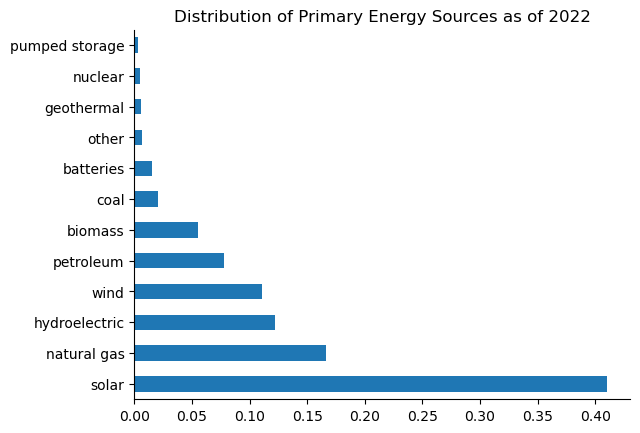

In [14]:
renewablePowerPlants["PrimSource"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of Primary Energy Sources as of 2022")
sns.despine()
plt.show()

From the plot above, we can see that solar power is solely contributing over 40% of the total power production in the U.S. This suggests further suggests the importance of solar power in modern power production. Looking at hydroelectrc power and wind power, their contribution is also comparable to petroleum and natural gas. 

For the scope of this project, we will focus on the power plants that use `solar`, `hydroelectric`, `wind`, `geothermal`, and `biomass` as their primary energy source. Let's update the dataframe we will use in this project:

In [15]:
# create the filter list
filter_list = ['solar', 'wind', 'hydroelectric', 'geothermal', 'biomass']

# filter the rows using the filter list
renewablePowerPlants = renewablePowerPlants[renewablePowerPlants["PrimSource"].isin(filter_list)]

# reset the index of the dataframe
renewablePowerPlants.reset_index(inplace=True, drop=True)

# sanity check
renewablePowerPlants["PrimSource"].unique()

array(['hydroelectric', 'geothermal', 'wind', 'biomass', 'solar'],
      dtype=object)

Describe the updated dataframe:

In [16]:
df_shape = renewablePowerPlants.shape
cat_cols = len(renewablePowerPlants.select_dtypes('object').columns)
num_cols = len(renewablePowerPlants.select_dtypes('number').columns)

print(f'Rows: {df_shape[0]}')
print(f'Columns: {df_shape[1]}\n')

print(f'Total duplicate rows: {renewablePowerPlants.duplicated().sum()}')
print(f'Percentage duplicate rows: {renewablePowerPlants.duplicated().mean()}% \n')

print(f'Total null values: {renewablePowerPlants.isna().sum().sum()}')
print(f'Percentage null vales: {renewablePowerPlants.isna().mean().sum()}% \n')

renewablePowerPlants.info()

print("\n")

print(f'Number of categorical columns: {cat_cols}')
print(f'Number of numerical columns: {num_cols}')

Rows: 8156
Columns: 9

Total duplicate rows: 58
Percentage duplicate rows: 0.007111329082883766% 

Total null values: 0
Percentage null vales: 0.0% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sector_name  8156 non-null   object 
 1   PrimSource   8156 non-null   object 
 2   source_desc  8156 non-null   object 
 3   tech_desc    8156 non-null   object 
 4   Install_MW   8156 non-null   float64
 5   Total_MW     8156 non-null   float64
 6   State        8156 non-null   object 
 7   Longitude    8156 non-null   float64
 8   Latitude     8156 non-null   float64
dtypes: float64(4), object(5)
memory usage: 573.6+ KB


Number of categorical columns: 5
Number of numerical columns: 4


The number of columns has decreased significantly. It is interesting to note that the number of duplicate rows has actually increased from the previously calculated 0. Let's take a look at the duplicate rows and try to identify why they are there:

In [17]:
renewablePowerPlants[renewablePowerPlants.duplicated(keep=False)]

,sector_name,PrimSource,source_desc,tech_desc,Install_MW,Total_MW,State,Longitude,Latitude
1726,Commercial Non-CHP,biomass,Biomass = 2.8 MW,Landfill Gas,3.2,2.8,California,-122.748900,38.301700
1727,Commercial Non-CHP,biomass,Biomass = 2.8 MW,Landfill Gas,3.2,2.8,California,-122.748900,38.301700
2412,IPP Non-CHP,wind,Wind = 150 MW,Onshore Wind Turbine,150.0,150.0,California,-118.295278,35.023889
2413,IPP Non-CHP,wind,Wind = 150 MW,Onshore Wind Turbine,150.0,150.0,California,-118.295278,35.023889
2738,IPP Non-CHP,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,California,-121.381101,38.365053
...,...,...,...,...,...,...,...,...,...
8079,IPP Non-CHP,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,New York,-76.650000,42.850000
8080,IPP Non-CHP,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,New York,-75.950000,43.050000
8081,IPP Non-CHP,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,New York,-75.950000,43.050000
8114,IPP Non-CHP,solar,Solar = 2 MW,Solar Photovoltaic,2.0,2.0,Illinois,-89.084790,42.176060


Assuming the columns that we removed were the reason why these duplicates were not initially discovered. However, the remaining columns are the key description of a power plants, thereby I suspect a power plant could have more than one name. As a results, there is a high chance that these rows are actual duplicates. 

Now, we can move on to data cleaning.

---

## Data Cleaning <a id="data-cleaning"></a>

In the data cleaning stage of the project, we will be identifying null values and duplicates in the DataFrame, and appropriately handle them. Then, we will move on to the EDA stage of this data set.

### Rename the column name
As of personal preference, I will be renaming the columns for consistency.

In [18]:
# Rename some of columns for consistency
renewablePowerPlants = renewablePowerPlants.rename(columns={"sector_name": "SectorName", "source_desc": "SourceDesc", "tech_desc": "TechDesc"})

# sanity check
renewablePowerPlants.head(5)

,SectorName,PrimSource,SourceDesc,TechDesc,Install_MW,Total_MW,State,Longitude,Latitude
0,Electric Utility,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,Alabama,-87.356823,33.458665
1,Electric Utility,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,Alabama,-86.283056,32.583889
2,Electric Utility,hydroelectric,Hydroelectric = 71.1 MW,Conventional Hydroelectric,72.9,71.1,Alabama,-86.052400,33.784500
3,Electric Utility,hydroelectric,Hydroelectric = 48 MW,Conventional Hydroelectric,46.9,48.0,Alabama,-87.449500,33.255300
4,Electric Utility,hydroelectric,Hydroelectric = 129.2 MW,Conventional Hydroelectric,100.0,129.2,Alabama,-86.254800,32.618900


### Duplicate Rows

In [19]:
print(f'Total duplicate rows: {renewablePowerPlants.duplicated().sum()}')
print(f'Percentage duplicate rows: {renewablePowerPlants.duplicated().mean()}% \n')

Total duplicate rows: 58
Percentage duplicate rows: 0.007111329082883766% 



As explained previously, these duplicate rows are likely to be the same power plants with different names. Even if we dropped these rows by mistake, they are 0.007% of the data set, thereby not sacrificing significant information. Let's drop these duplicate rows.

In [20]:
prev_shape = renewablePowerPlants.shape[0]
renewablePowerPlants.drop_duplicates(inplace=True)
current_shape = renewablePowerPlants.shape[0]
print(f'The number of rows in the DataFrame has decreased from {prev_shape} to {current_shape}')

The number of rows in the DataFrame has decreased from 8156 to 8098


In [21]:
# sanity check
print(f'Total duplicate rows: {renewablePowerPlants.duplicated().sum()}')

Total duplicate rows: 0


### Null values

In [22]:
print(f'Total null values: {renewablePowerPlants.isna().sum().sum()}')
print(f'Percentage null vales: {renewablePowerPlants.isna().mean().sum()}% \n')

Total null values: 0
Percentage null vales: 0.0% 



We are fortunately that there isn't any null values in the DataFrame. Let's move on to the EDA stage.

---

## EDA <a id="eda"></a>

### Categorical Columns <a id="categorical-columns"></a>

Let's start the EDA process with the categorical columns.

Find all the categorical columns:

In [23]:
# Select the columns that are categorical
renewablePowerPlants.select_dtypes('object').columns

Index(['SectorName', 'PrimSource', 'SourceDesc', 'TechDesc', 'State'], dtype='object')

### `SectorName`

In [24]:
# Get the proportion of different unique sector names
renewablePowerPlants["SectorName"].value_counts(normalize=True)

IPP Non-CHP           0.749197
Electric Utility      0.186466
Commercial Non-CHP    0.027414
Industrial CHP        0.014571
Industrial Non-CHP    0.011484
IPP CHP               0.006174
Commercial CHP        0.004693
Name: SectorName, dtype: float64

In [25]:
numSectors = len(renewablePowerPlants["SectorName"].unique())
print(f"Number of Unqiue Sectors in the data set: {numSectors}")

Number of Unqiue Sectors in the data set: 7


We can see that there are seven sectors for the power plants. Almost 75% of the renewable power plants are in the `IPP Non-CHP` sector. Let's create a dictionary that describes these sector names:

- IPP: Independent Power Producer
- Commercial: Commerical Power Producer
- Industrial: Industrial Power Producer
- Electric Utility: Company in the electric power industry (often public utilities, e.g. BC Hydro) | [reference](https://en.wikipedia.org/wiki/Electric_utility)
- CHP: Combined heat and power | [reference](https://www.eia.gov/tools/glossary/index.php?id=C#comb_heat_power)
- Non-CHP: Electricity only


It could be an interesting classification problem to predict whether a power plant is CHP or Non-CHP. Such information will be informative for the utility companies to estimate the potential of the power plants being Non-CHP, especially for the places that are cold.

### `PrimSource`

This column describes the primary energy source of the power plants. Since this project focuses on renewable energy sources, we have previously filtered the power plants that have `solar`, `wind`, `geothermal`, `hydroelectric`, and `biomass`. Let's take a look at the distribution:

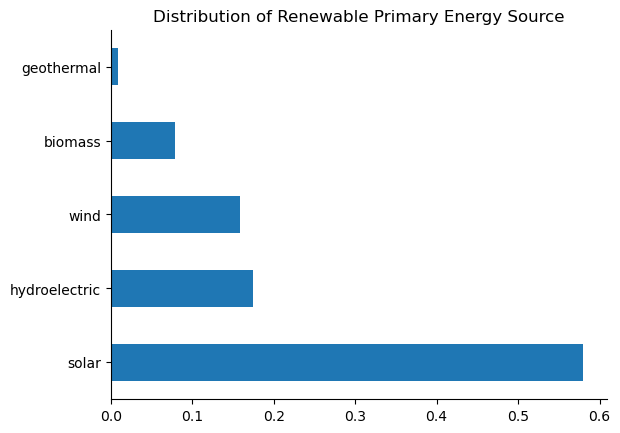

In [26]:
renewablePowerPlants["PrimSource"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of Renewable Primary Energy Source")
sns.despine()
plt.show()

We can see that `solar` power plants consist of almost 60% of the data, which gives us an imbalanced data if we are doing classification between the different class of energy sources. To deal with this feature, we can apply oversampling or undersampling techniques. However, we decided to simplify the problem to a binary classification problem between solar and non-solar.

### `SourceDesc`

In [27]:
renewablePowerPlants["SourceDesc"].value_counts(normalize=True)

Solar = 1 MW                                0.070388
Solar = 2 MW                                0.066313
Solar = 5 MW                                0.061497
Solar = 1.5 MW                              0.025438
Solar = 3 MW                                0.024450
                                              ...   
Hydroelectric = 119 MW                      0.000123
Biomass = 95.5 MW, Natural Gas = 21 MW      0.000123
Biomass = 49.3 MW, Natural Gas = 18.9 MW    0.000123
Biomass = 17.6 MW                           0.000123
Geothermal = 21.9MW                         0.000123
Name: SourceDesc, Length: 1892, dtype: float64

We can see that the `SourceDesc` column shows the power generated by energy source type. Some of the power plants have multiple energy source, and that is hinting the classes of Primary Source could be overlapping in the multivariable space. As a result, confusing the classification machine learning model. However, we can also see an opportunity here to apply clustering algorithms and create a recommendation system to recommend the suitable energy sources for a location. Another opportunity is to perform classification on this column after converting this column into a binary variable, referencing power plants with only one energy source or more.

### `TechDesc`

This column describes the technology used to generate power. Let's take a look at the values:

In [28]:
display(renewablePowerPlants["TechDesc"].value_counts(normalize=True))

Solar Photovoltaic                                                                         0.558286
Conventional Hydroelectric                                                                 0.173500
Onshore Wind Turbine                                                                       0.155594
Landfill Gas                                                                               0.038034
Wood/Wood Waste Biomass                                                                    0.020869
Batteries; Solar Photovoltaic;                                                             0.019264
Other Waste Biomass                                                                        0.009385
Geothermal                                                                                 0.007656
Municipal Solid Waste                                                                      0.007286
Batteries; Onshore Wind Turbine;                                                           0.001111


There are too many different technology combinations. Let's view the technology for different primary source class:

In [29]:
# Get the proportion of different technology by primary energy source
for source in renewablePowerPlants["PrimSource"].unique():
    filter = renewablePowerPlants["PrimSource"] == source
    print(f"Primary Source: {source}")
    display(renewablePowerPlants[filter]["TechDesc"].value_counts(normalize=True))

Primary Source: hydroelectric


Conventional Hydroelectric                                   0.992933
Hydroelectric Pumped Storage; Conventional Hydroelectric;    0.003534
Conventional Hydroelectric; Petroleum Liquids;               0.002827
Batteries; Conventional Hydroelectric;                       0.000707
Name: TechDesc, dtype: float64

Primary Source: geothermal


Geothermal                         0.925373
Geothermal; Solar Photovoltaic;    0.074627
Name: TechDesc, dtype: float64

Primary Source: wind


Onshore Wind Turbine                                           0.984375
Batteries; Onshore Wind Turbine;                               0.007031
Solar Photovoltaic; Onshore Wind Turbine;                      0.003125
Offshore Wind Turbine                                          0.001563
Batteries; Solar Photovoltaic; Onshore Wind Turbine            0.001563
Petroleum Liquids; Onshore Wind Turbine;                       0.000781
Solar Thermal without Energy Storage; Onshore Wind Turbine;    0.000781
Natural Gas Fired Combustion Turbine; Onshore Wind Turbine;    0.000781
Name: TechDesc, dtype: float64

Primary Source: biomass


Landfill Gas                                                      0.481250
Wood/Wood Waste Biomass                                           0.264062
Other Waste Biomass                                               0.118750
Municipal Solid Waste                                             0.092188
Wood/Wood Waste Biomass; Conventional Hydroelectric;              0.010937
Wood/Wood Waste Biomass; Natural Gas Steam Turbine;               0.007812
Wood/Wood Waste Biomass; Natural Gas Fired Combustion Turbine;    0.006250
Other Waste Biomass; Petroleum Liquids;                           0.004687
Wood/Wood Waste Biomass; Conventional Steam Coal;                 0.003125
Municipal Solid Waste; Solar Photovoltaic;                        0.001563
Wood/Wood Waste Biomass; Petroleum Liquids;                       0.001563
Municipal Solid Waste; Petroleum Liquids;                         0.001563
Other Waste Biomass; Conventional Hydroelectric;                  0.001563
Other Waste Biomass; All 

Primary Source: solar


Solar Photovoltaic                                                                         0.962734
Batteries; Solar Photovoltaic;                                                             0.033220
Solar Thermal without Energy Storage                                                       0.001491
Solar Thermal with Energy Storage                                                          0.000426
Other Natural Gas; Solar Photovoltaic;                                                     0.000426
Solar Photovoltaic; Onshore Wind Turbine;                                                  0.000426
Other Waste Biomass; Solar Photovoltaic;                                                   0.000213
Natural Gas Fired Combustion Turbine; Solar Photovoltaic;                                  0.000213
Other Waste Biomass; Other Natural Gas; Solar Photovoltaic                                 0.000213
Landfill Gas; Solar Photovoltaic;                                                          0.000213


Seems like we need filter our data further to only include power plants with technology solely associates with the primary energy source, fortunately, these rows of data consist of over 95% of the data in the corresponding primary energy source group. The classes of `TechDesc` that we will include:
<br>
**Hydroelectric**
- `Conventional Hydroelectric`
<br>
**Geothermal**
- `Geothermal`
<br>
**Wind**
- `Onshore Wind Turbine`
<br>
**Biomass**
- `Landfill Gas`
- `Wood/Wood Waste Biomass`
- `Other Waste Biomass`
- `Municipal Solid Waste`
<br>
**Solar**
- `Solar Photovoltaic`

In [30]:
# create the filter list
filter_list = ['Conventional Hydroelectric', 
               'Geothermal', 
               'Onshore Wind Turbine', 
               'Landfill Gas', 
               'Wood/Wood Waste Biomass', 
               'Other Waste Biomass', 
               'Municipal Solid Waste',
               'Solar Photovoltaic']

# filter the rows using the filter list
renewablePowerPlants = renewablePowerPlants[renewablePowerPlants["TechDesc"].isin(filter_list)]

# reset the index of the dataframe
renewablePowerPlants.reset_index(inplace=True, drop=True)

# sanity check
renewablePowerPlants["TechDesc"].unique()

array(['Conventional Hydroelectric', 'Geothermal',
       'Wood/Wood Waste Biomass', 'Onshore Wind Turbine',
       'Municipal Solid Waste', 'Landfill Gas', 'Other Waste Biomass',
       'Solar Photovoltaic'], dtype=object)

In [31]:
df_shape = renewablePowerPlants.shape
cat_cols = len(renewablePowerPlants.select_dtypes('object').columns)
num_cols = len(renewablePowerPlants.select_dtypes('number').columns)

print(f'Rows: {df_shape[0]}')
print(f'Columns: {df_shape[1]}\n')

print(f'Total duplicate rows: {renewablePowerPlants.duplicated().sum()}')
print(f'Percentage duplicate rows: {renewablePowerPlants.duplicated().mean()}% \n')

print(f'Total null values: {renewablePowerPlants.isna().sum().sum()}')
print(f'Percentage null vales: {renewablePowerPlants.isna().mean().sum()}% \n')

renewablePowerPlants.info()

print("\n")

print(f'Number of categorical columns: {cat_cols}')
print(f'Number of numerical columns: {num_cols}')

Rows: 7860
Columns: 9

Total duplicate rows: 0
Percentage duplicate rows: 0.0% 

Total null values: 0
Percentage null vales: 0.0% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SectorName  7860 non-null   object 
 1   PrimSource  7860 non-null   object 
 2   SourceDesc  7860 non-null   object 
 3   TechDesc    7860 non-null   object 
 4   Install_MW  7860 non-null   float64
 5   Total_MW    7860 non-null   float64
 6   State       7860 non-null   object 
 7   Longitude   7860 non-null   float64
 8   Latitude    7860 non-null   float64
dtypes: float64(4), object(5)
memory usage: 552.8+ KB


Number of categorical columns: 5
Number of numerical columns: 4


In [32]:
print(f'The number of rows in the DataFrame has decreased from {current_shape} to {renewablePowerPlants.shape[0]}')

The number of rows in the DataFrame has decreased from 8098 to 7860


### `State`

First, let's convert State name to State Abbreviation using Crosswalks

#### Number of Renewable Power Plants by state

In [33]:
# Get count of the Renewable Power Plants by state
tmp = renewablePowerPlants.groupby('State').agg(
    count_col=pd.NamedAgg(column='PrimSource', aggfunc="count")
)

# Get Crosswalk From Generic Website
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'
states = pd.read_html(cw_location + cw_filename)[0]

# Create New Variable With State Abbreviations
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
tmp['StateCode'] = tmp.index.map(state_code_map)

In [102]:
# Map the number of Renewable Power Plants
fig = px.choropleth(
    locations=tmp['StateCode'],
    locationmode='USA-states',
    color=tmp['count_col'],
    scope='usa',
    title='Total Number of Renewable Power Plants Per State'
)
fig.show()

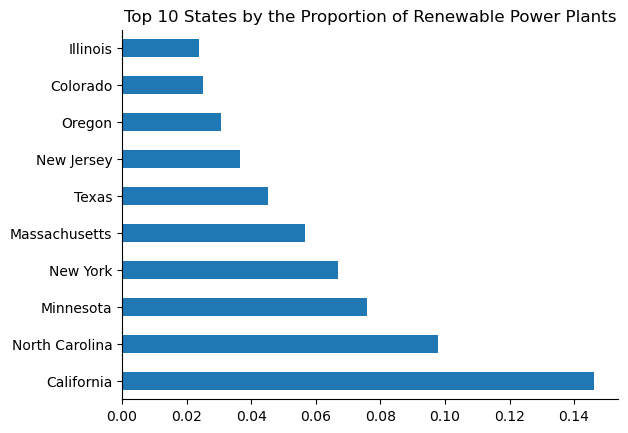

In [107]:
renewablePowerPlants["State"].value_counts(normalize=True).sort_values(ascending=False)[:10].plot(kind="barh")
plt.title("Top 10 States by the Proportion of Renewable Power Plants")
sns.despine()
plt.show()

#### Total Power of Renewable Power Plants by state

In [39]:
# Get the sum of total power of Renewable Power Plants by state
tmp = renewablePowerPlants.groupby('State').agg(
    Total_MW=pd.NamedAgg(column='Total_MW', aggfunc="sum")
)

# Get Crosswalk From Generic Website
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'
states = pd.read_html(cw_location + cw_filename)[0]

# Create New Variable With State Abbreviations
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
tmp['StateCode'] = tmp.index.map(state_code_map)

# Map the number of Renewable Power Plants
fig = px.choropleth(
    locations=tmp['StateCode'],
    locationmode='USA-states',
    color=tmp['Total_MW'],
    scope='usa',
    title='Total Power in MW of Renewable Power Plants Per State'
)
fig.show()

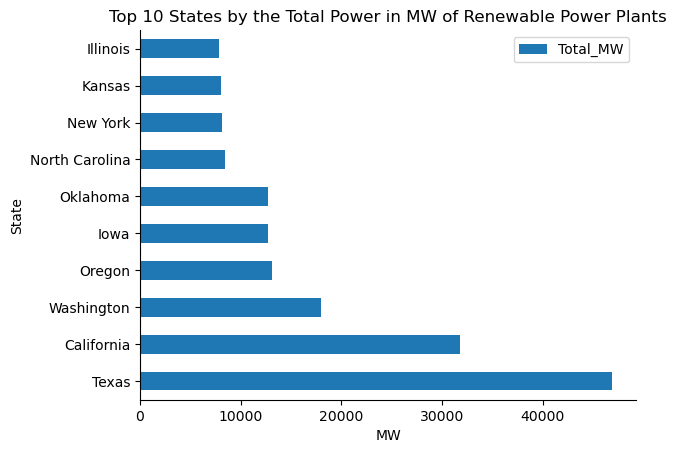

In [40]:
tmp.sort_values(by="Total_MW", ascending=False)[:10].plot(kind="barh")
plt.title("Top 10 States by the Total Power in MW of Renewable Power Plants")
plt.xlabel("MW")
sns.despine()
plt.show()

It is interesting to see that even California has the most number of renewable power plants, it comes up short in terms of Total Power. Texas is the state that produce the most renewable power. I argue that the reason why these two states excel in renewable energy may not solely due to the climate and weather conidtions but more to the supportive policies developed to encourage the growth of renewable energy.

For instance, California has set ambitious renewable energy goals to reduce greenhouse gas emissions and combat climate change, The state's [Renewable Portfolio Standard (RPS)](https://www.cpuc.ca.gov/rps/) requires utilities to produce 60% of their electricity from renewable sources by 2030 and 100% clean energy by 2045.

The contribution of policies to the suitability of solar energy may not be able to captured by the models developed in this project.

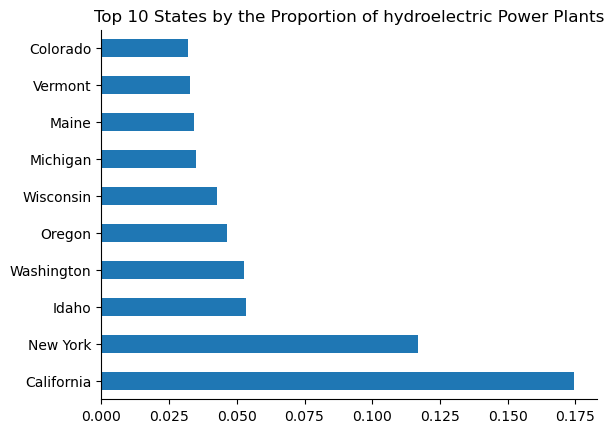

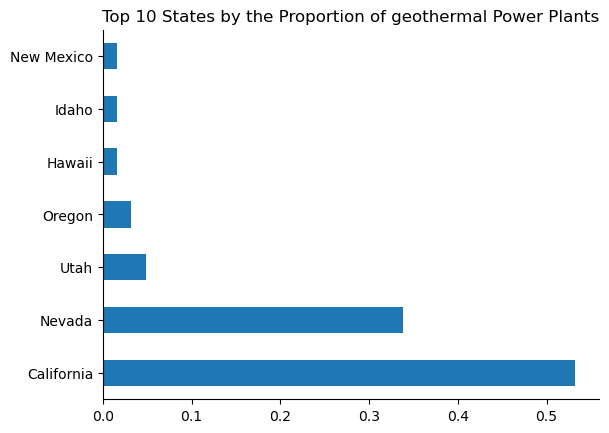

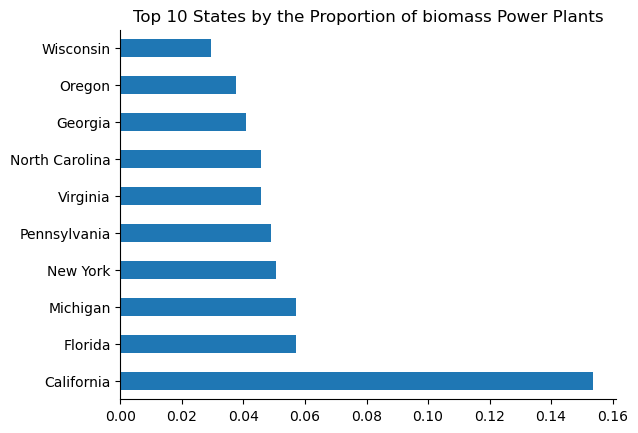

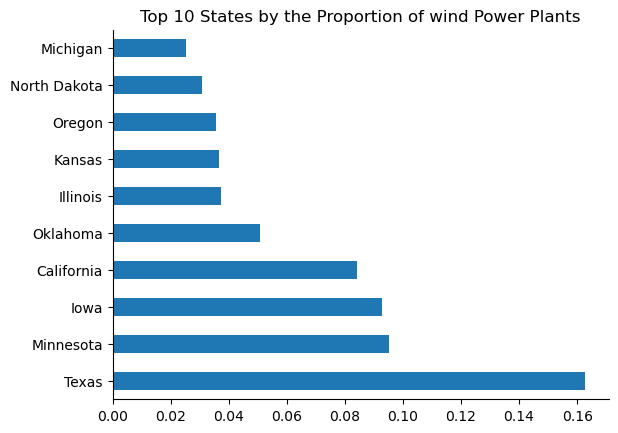

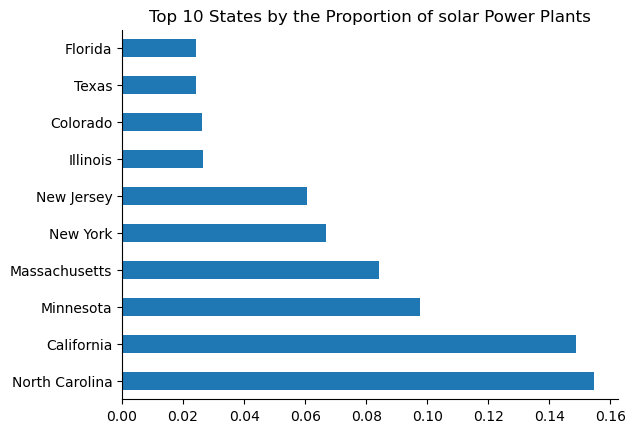

In [110]:
for source in renewablePowerPlants["PrimSource"].unique():
    tmp_df = renewablePowerPlants[renewablePowerPlants["PrimSource"] == source]
    tmp_df["State"].value_counts(normalize=True).sort_values(ascending=False)[:10].plot(kind="barh")
    plt.title(f"Top 10 States by the Proportion of {source} Power Plants")
    sns.despine()
    plt.show()

In [111]:
for source in renewablePowerPlants["PrimSource"].unique():
    # Get count of the Renewable Power Plants by state
    tmp = renewablePowerPlants[renewablePowerPlants['PrimSource'] == source].groupby('State').agg(
        count_col=pd.NamedAgg(column='PrimSource', aggfunc="count")
    )

    # Get Crosswalk From Generic Website
    cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
    cw_filename = 'state_codes.html'
    states = pd.read_html(cw_location + cw_filename)[0]

    # Create New Variable With State Abbreviations
    state_code_map = dict(zip(states['Description'], 
                            states['Code']))
    tmp['StateCode'] = tmp.index.map(state_code_map)

    # Map the number of Renewable Power Plants
    fig = px.choropleth(
        locations=tmp['StateCode'],
        locationmode='USA-states',
        color=tmp['count_col'],
        scope='usa',
        title=f'Total Number of {source} Power Plants Per State'
    )
    fig.show()

### Numerical Columns <a id="numerical-columns"></a>

Let's do some EDA with the numerical columns:

In [44]:
# Get the numerical columns from the dataframe
num_cols = renewablePowerPlants.select_dtypes('number')

# sanity check
num_cols.columns

Index(['Install_MW', 'Total_MW', 'Longitude', 'Latitude'], dtype='object')

In [46]:
# Get the statistics of the numerical columns
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Install_MW,7860.0,36.278003,96.310435,0.300000,2.000000,5.000000,23.000000,2456.200000
Total_MW,7860.0,35.750433,94.878079,0.000000,2.000000,4.900000,21.300000,2434.900000
Longitude,7860.0,-93.227478,18.021808,-159.581667,-110.496667,-89.426768,-77.570750,-65.681319
Latitude,7860.0,39.111311,5.016548,17.947524,35.300050,39.888749,42.865837,64.058333


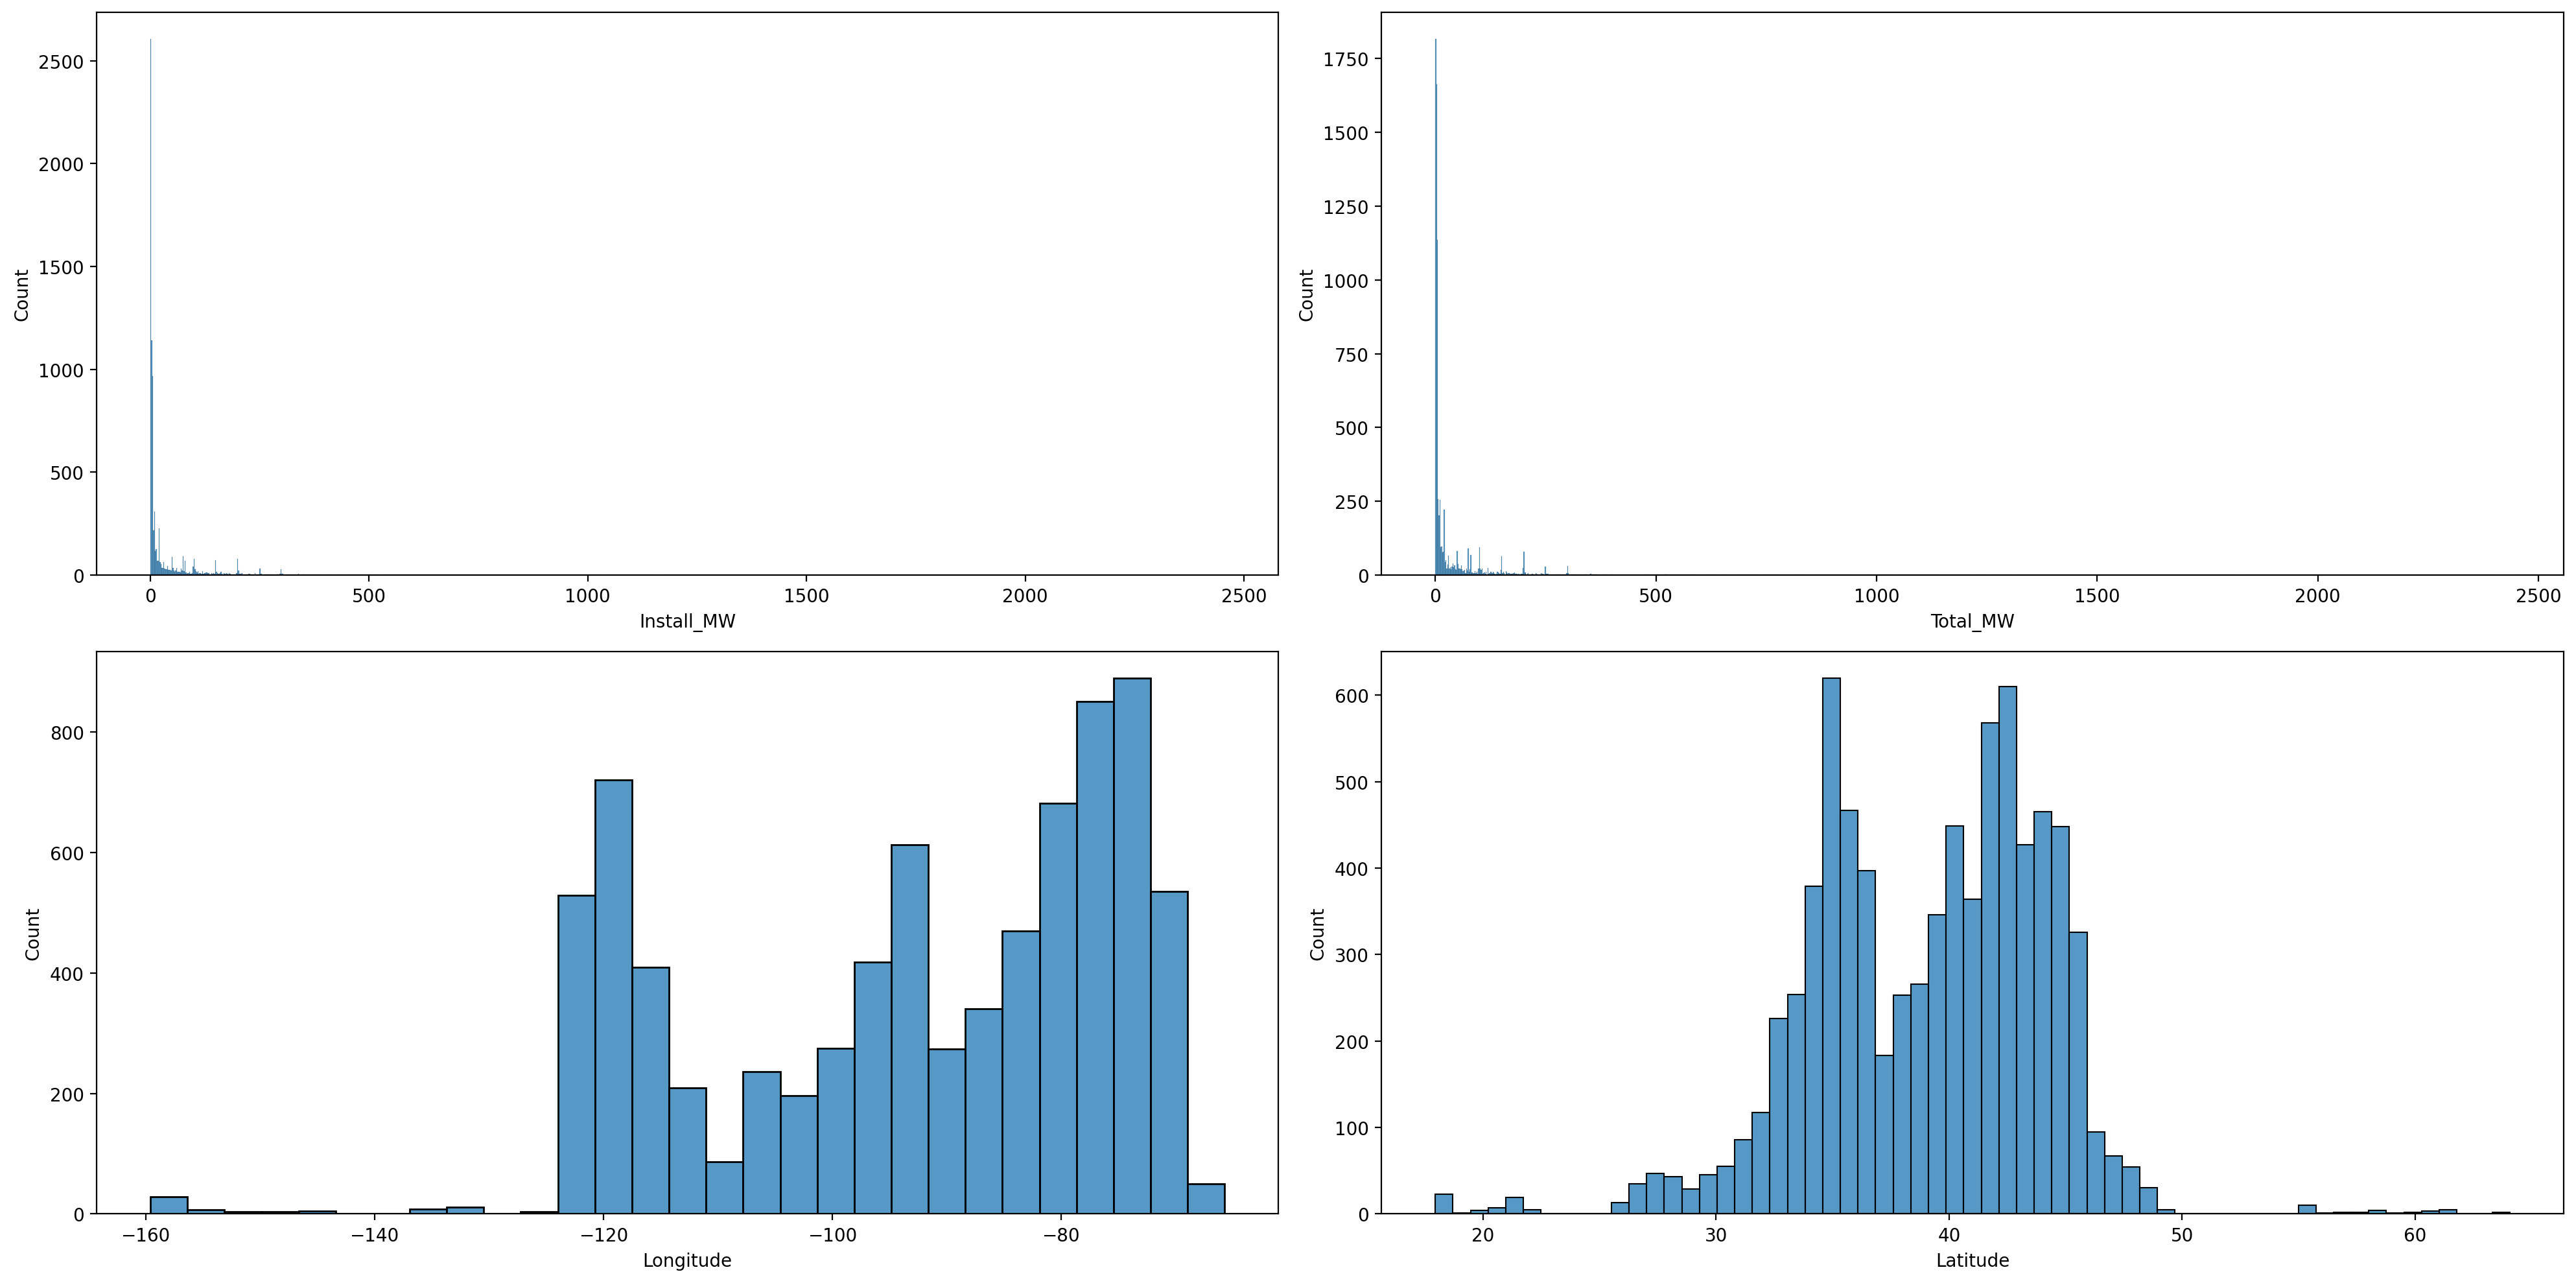

In [47]:
# Create the rows and columns variables
columns = 2
rows = 2

# Create subplots
plt.subplots(rows, columns, figsize=(20, 10), dpi=200)

# Loop through the columns
for position, column in enumerate(num_cols, start=1):
    mean = num_cols[column].mean()
    median = num_cols[column].median()
    
    # Create subplot
    plt.subplot(rows, columns, position)
    sns.histplot(num_cols[column])

plt.tight_layout()
plt.show()

- We can see that the distributions of `Install_MW` and `Total_MW` are heavily right-skewed, with outliers producing power up to 2500MW.
- The distribution of `Longitude` and `Latitude` are not normally distributed. Renewable power plants seem to concentrate in the east, west, north, and south of U.S. territory but not the central area. It is interesting to know why.

#### BoxPlots of `Install_MW` and `Total_MW`

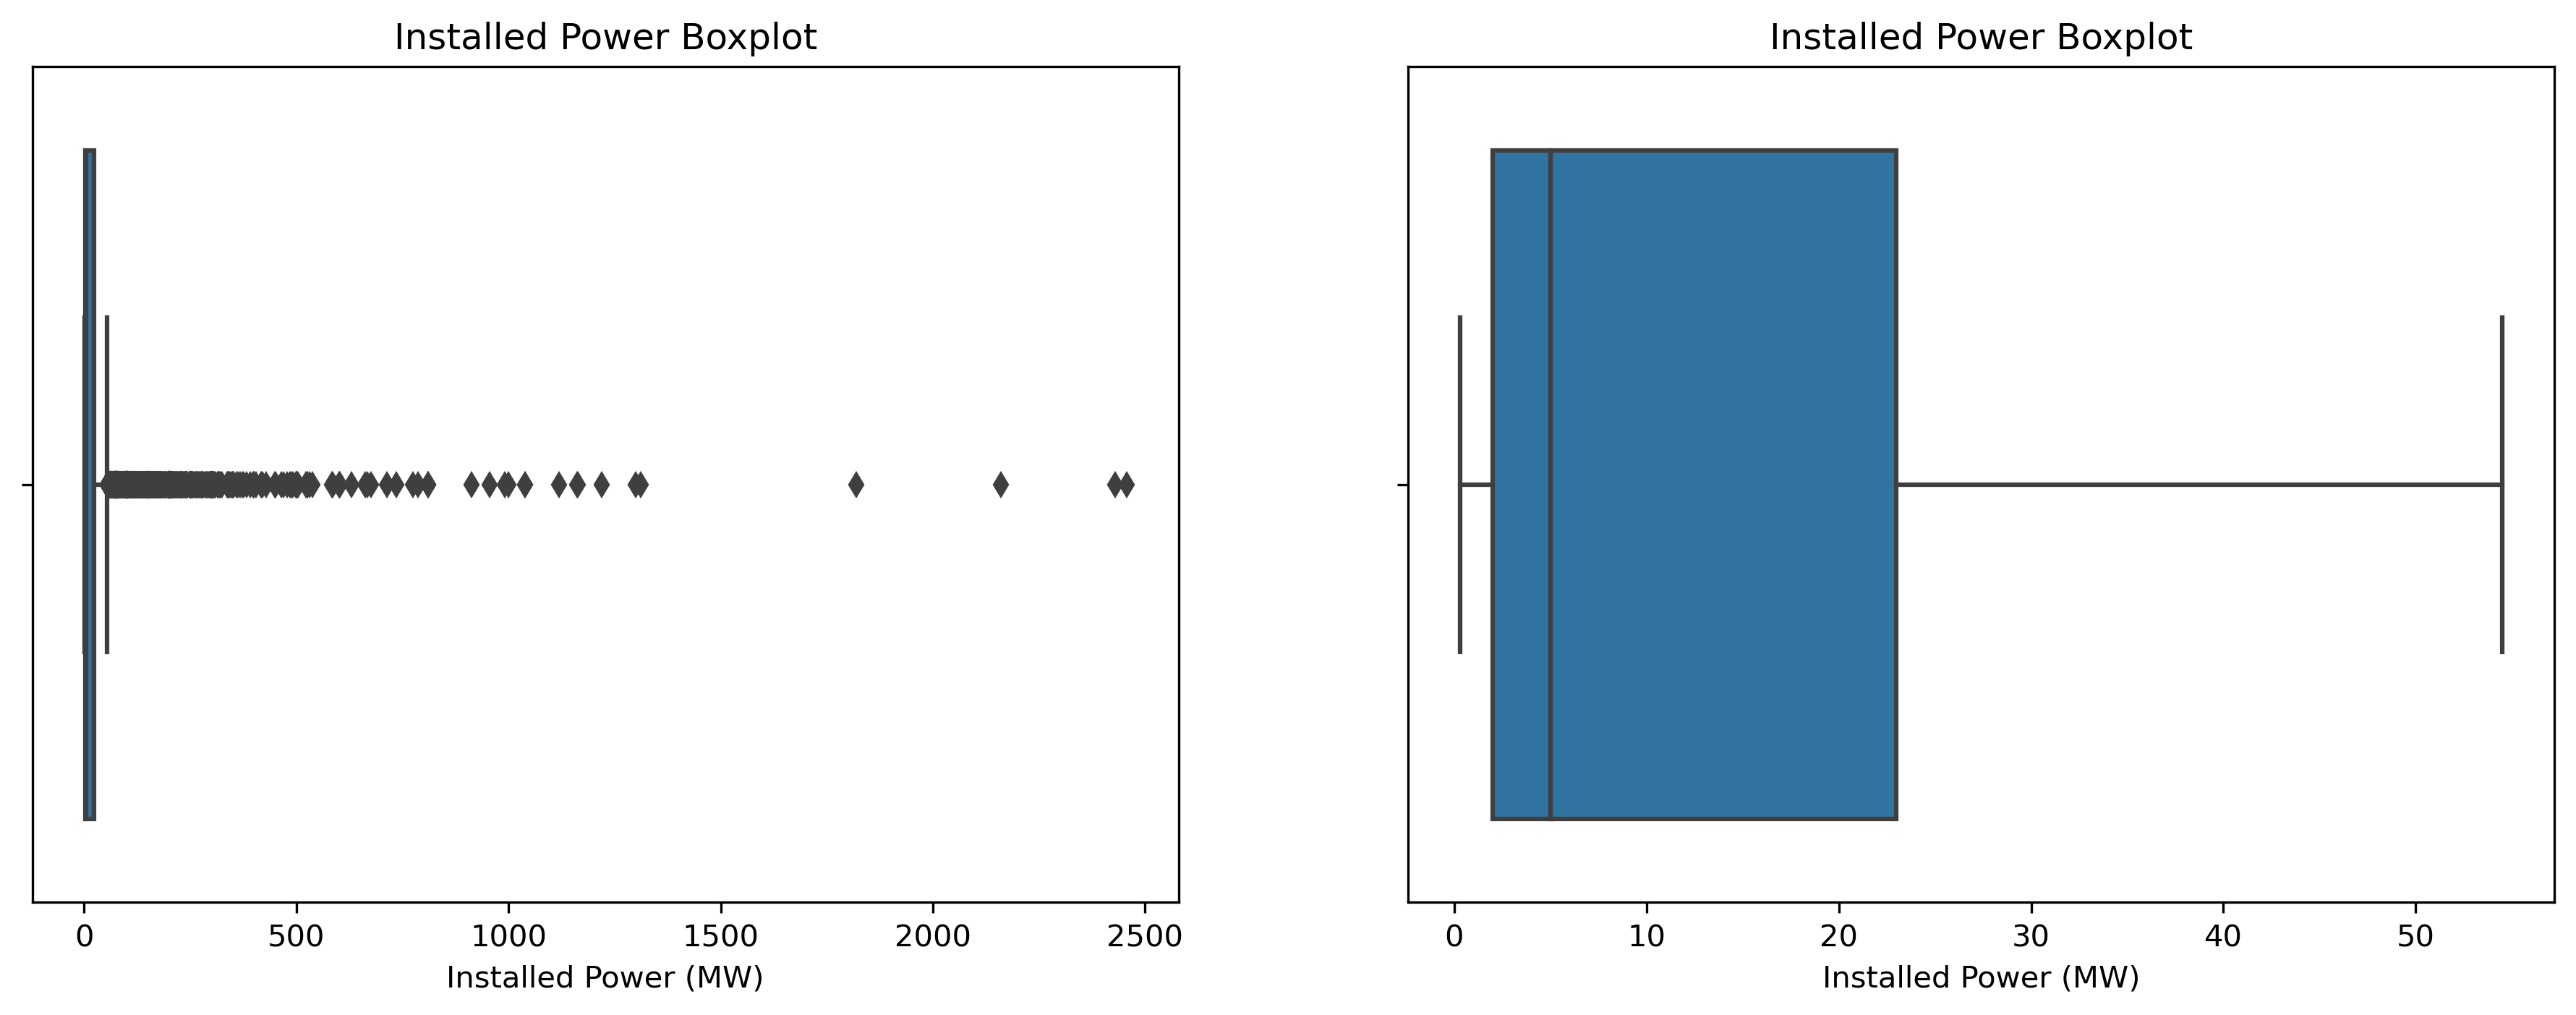

In [49]:
plt.subplots(1, 2, figsize=(15, 5), dpi=300)

plt.subplot(1, 2, 1)
sns.boxplot(x='Install_MW', data=num_cols)
plt.title('Installed Power Boxplot')
plt.xlabel('Installed Power (MW)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Install_MW', data=num_cols, showfliers=False)
plt.title('Installed Power Boxplot')
plt.xlabel('Installed Power (MW)')

plt.show()

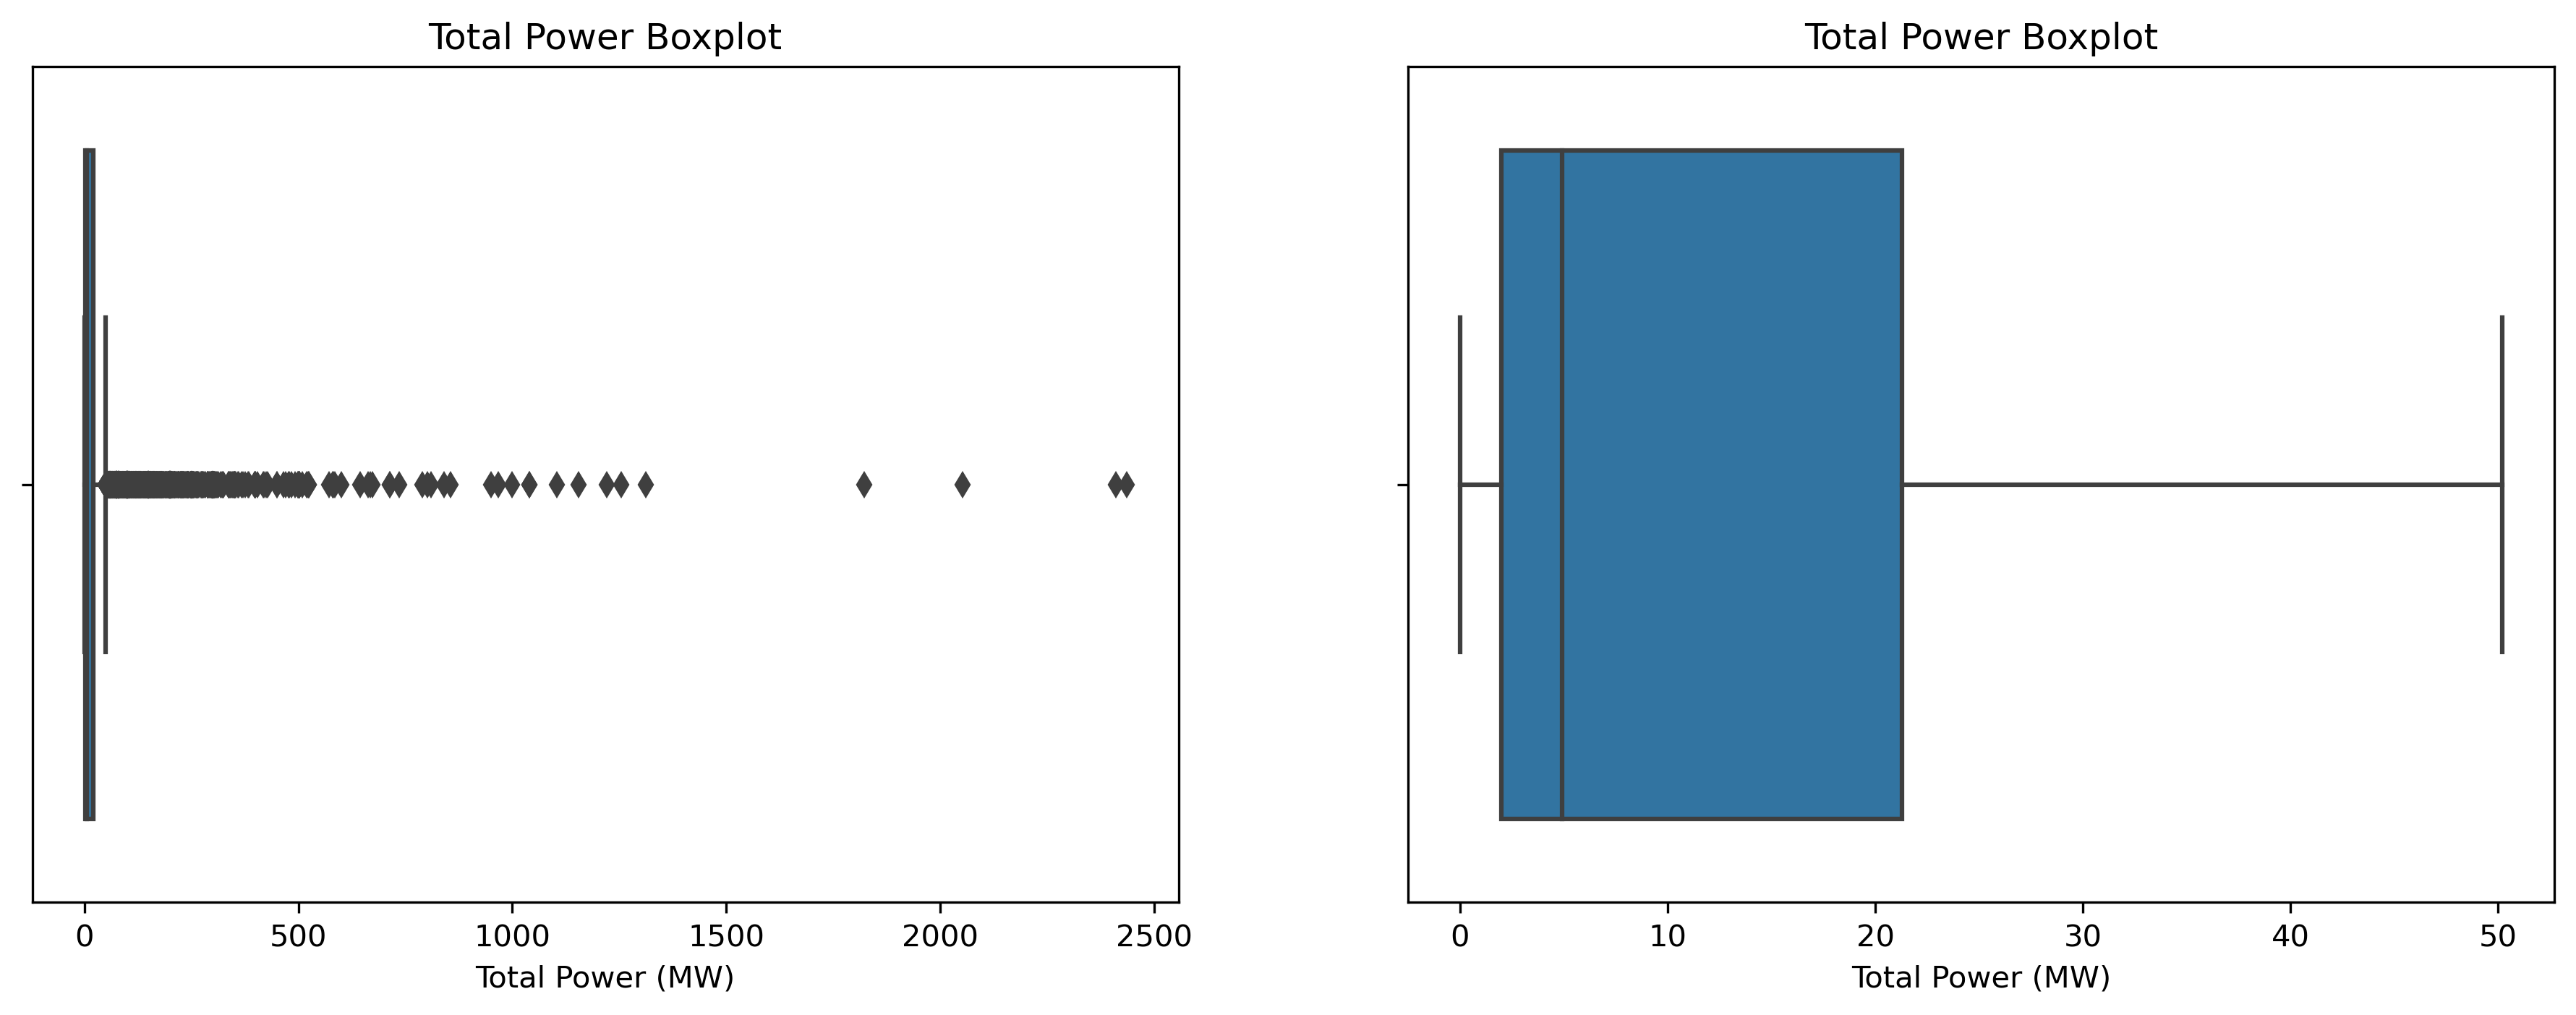

In [50]:
plt.subplots(1, 2, figsize=(15, 5), dpi=300)

plt.subplot(1, 2, 1)
sns.boxplot(x='Total_MW', data=num_cols)
plt.title('Total Power Boxplot')
plt.xlabel('Total Power (MW)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Total_MW', data=num_cols, showfliers=False)
plt.title('Total Power Boxplot')
plt.xlabel('Total Power (MW)')

plt.show()

The boxplots above confirm that the outliers are driving the distribution of `Install_MW` and `Total_MW` to have heavily right skewed.

#### Maps of Renewable Power Plants and Their Total Power Output by Primary Energy Source in the United States of America

In [51]:
import geopandas as gpd

/var/folders/s_/7zs1_mq56sn__p5wmr52p3hr0000gn/T/ipykernel_95115/3162824421.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Figure size 3000x3000 with 0 Axes>

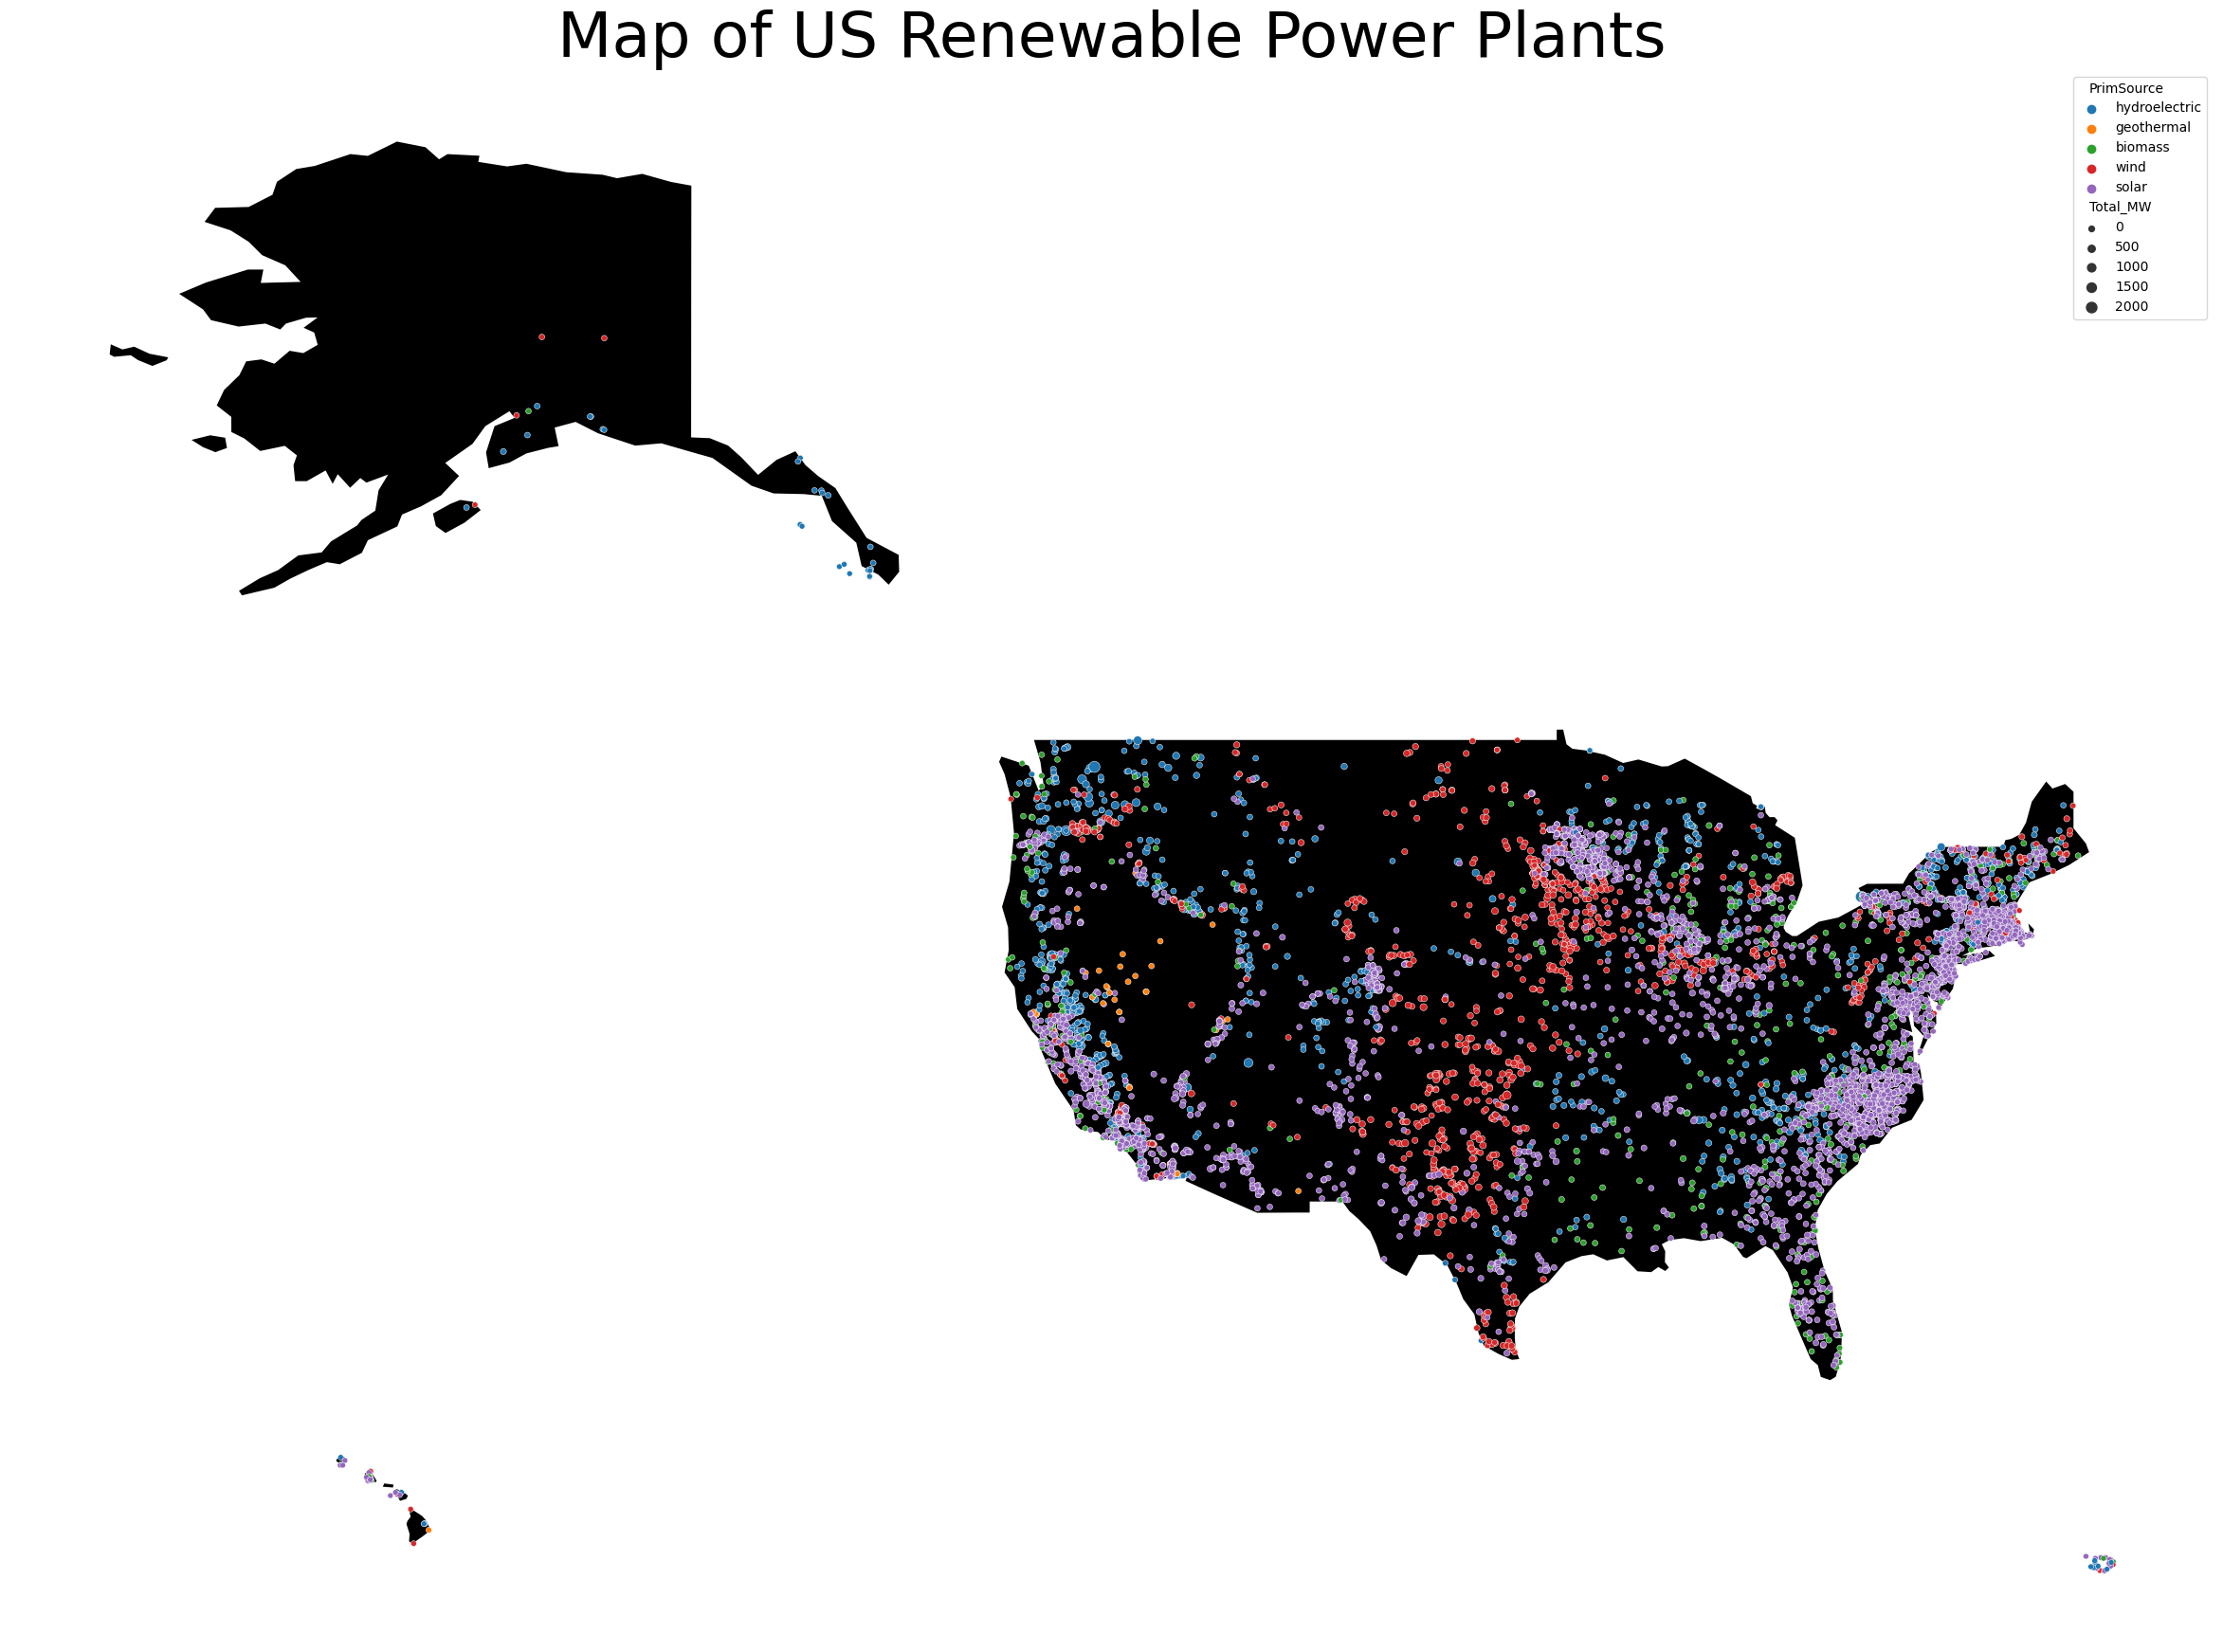

In [55]:
# Get map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us = world[world['name'] == 'United States of America']

# Plot scatter and map
plt.figure(figsize=(30, 30))
us.plot(figsize=(30, 30), color='black')
plt.title('Map of US Renewable Power Plants', fontsize=48)
sns.scatterplot(x='Longitude', y='Latitude', hue='PrimSource', size='Total_MW', data=renewablePowerPlants)
plt.axis(False)
plt.show()

Notes for the map:
- Solar power plants cluster along the east and west coast with the majority locate in the east coast
- Majority of the wind power plants are found in the central area of the territory

### Relevant Columns Selection

In [57]:
# look at the info of the dataframe
renewablePowerPlants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SectorName  7860 non-null   object 
 1   PrimSource  7860 non-null   object 
 2   SourceDesc  7860 non-null   object 
 3   TechDesc    7860 non-null   object 
 4   Install_MW  7860 non-null   float64
 5   Total_MW    7860 non-null   float64
 6   State       7860 non-null   object 
 7   Longitude   7860 non-null   float64
 8   Latitude    7860 non-null   float64
dtypes: float64(4), object(5)
memory usage: 552.8+ KB


In [58]:
renewablePowerPlants_final = renewablePowerPlants.drop(columns=['SectorName', 'SourceDesc', 'TechDesc', 'Install_MW', 'Total_MW'])

# sanity check
renewablePowerPlants_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PrimSource  7860 non-null   object 
 1   State       7860 non-null   object 
 2   Longitude   7860 non-null   float64
 3   Latitude    7860 non-null   float64
dtypes: float64(2), object(2)
memory usage: 245.8+ KB


Save the final renewable power plants dataframe to CSV

In [59]:
# Write the DataFrame to CSV file
renewablePowerPlants_final.to_csv("./data/capstone_renewable_power_plants.csv", index=False)

## Next Steps:

We will use the final renewable power plants DataFrame to extract geospatial data of the power plants from the Raster maps